In [1]:
import datetime
import pyaurorax
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

# Compute absolute intensity from spectrograph data

TREx Spectrograph data allows you to obtain the absolute intensities of known auroral emissions, such as the 427.8 nm Blueline, the 486.1 nm HBeta, the 557.7 nm Greenline, or the 630.0 nm Redline emissions. These are obtained via an integration of the spectra over a known wavelength range (and subtraction of a background intensity over another known background wavelength range). Alternatively, if you would like to pull out a different emission, the tools below also have functionality to manually specify a wavlength range (and optionally a background range). 

Below are some examples of pulling out different emissions from the spectrograph data, to simply look at the absolute intensities as a function of time. This functionality is particularly handy for deriving inputs to the TREx-ATM model inversion calculation, which requires the absolute intensities of several common auroral emissions.

In [2]:
# download an hour of TREx Spectrograph data
dataset_name = "TREX_SPECT_PROCESSED_V1"
start_dt = datetime.datetime(2021, 2, 16, 9, 0)
end_dt = datetime.datetime(2021, 2, 16, 9, 59)
site_uid = "rabb"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

# read in the data
spect_data = aurorax.data.ucalgary.read(r.dataset, r.filenames)

## Calculate absolute intensities of common auroral emissions

In [3]:
# Let's first look at the absolute intensities for four common emissions, at a single spectrograph location, at a single point in time
t_0 = datetime.datetime(2021, 2, 16, 9, 30, 0)
spect_loc = 150

i_4278 = at.spectra.get_intensity(spect_data, t_0, spect_loc, spect_emission='blue')   # Blue-line emission
i_4861 = at.spectra.get_intensity(spect_data, t_0, spect_loc, spect_emission='hbeta')  # H-Beta emission
i_5577 = at.spectra.get_intensity(spect_data, t_0, spect_loc, spect_emission='green')  # Green-line emission
i_6300 = at.spectra.get_intensity(spect_data, t_0, spect_loc, spect_emission='red')    # Red-line emission


print(f"Absolute Intensities Measured at Spectrograph bin {spect_loc} for {t_0} UTC:\n")
print(f"\tBlue-line Intensity:  {i_4278} Rayleighs\n")
print(f"\tH-Beta Intensity:  {i_4861} Rayleighs\n")
print(f"\tGreen-line Intensity:  {i_5577} Rayleighs\n")
print(f"\tRed-line Intensity:   {i_6300} Rayleighs\n")

Absolute Intensities Measured at Spectrograph bin 150 for 2021-02-16 09:30:00 UTC:

	Blue-line Intensity:  1409.3408203125 Rayleighs

	H-Beta Intensity:  57.936309814453125 Rayleighs

	Green-line Intensity:  8608.9765625 Rayleighs

	Red-line Intensity:   798.8265991210938 Rayleighs



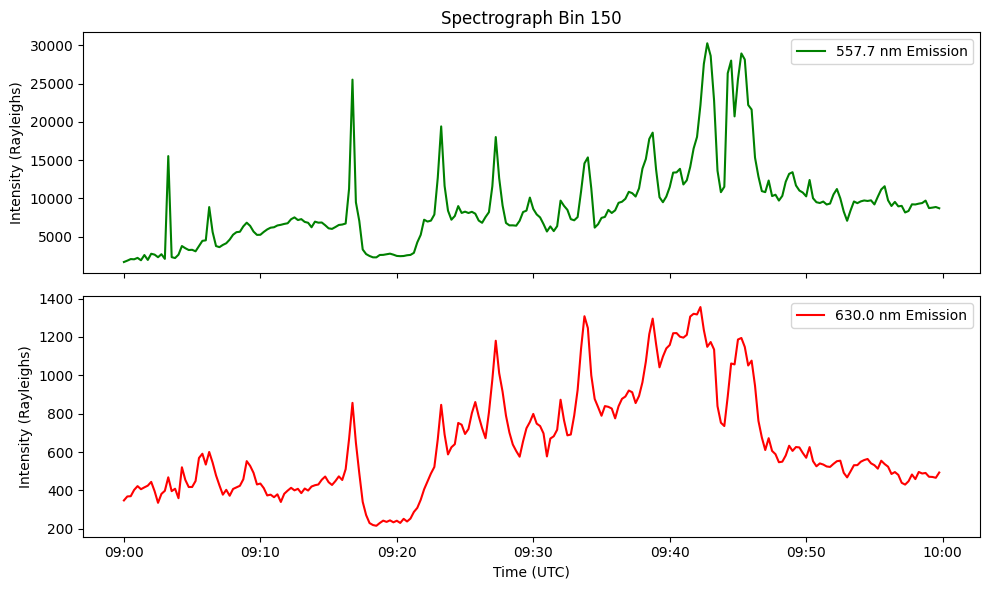

In [4]:
# Intstead of calculating intensities at a single point in time, we can use the entire timestamp range

# Let's just pass in the timestamp list associated with the data object for the greenline and redline
i_5577 = at.spectra.get_intensity(spect_data, spect_data.timestamp, spect_loc, spect_emission='green')  # Green-line emission
i_6300 = at.spectra.get_intensity(spect_data, spect_data.timestamp, spect_loc, spect_emission='red')    # Red-line emission

# The results will be a time series of each emission intensity. Let's plot them
x_axis = np.array(spect_data.timestamp)

# Create a stack plot for both the Green-line and Red-line emission intensities
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# plot green-line result
axs[0].plot(x_axis, i_5577, color='green', label="557.7 nm Emission")
axs[0].set_title(f'Spectrograph Bin {spect_loc}')
axs[0].set_ylabel('Intensity (Rayleighs)')
axs[0].legend()

# plot red-line result
axs[1].plot(x_axis, i_6300, color='red', label="630.0 nm Emission")
axs[1].set_ylabel('Intensity (Rayleighs)')
axs[1].legend()

# Make the plot look nice
locator = mdates.AutoDateLocator()
formatter = mdates.DateFormatter('%H:%M')
axs[1].xaxis.set_major_locator(locator)
axs[1].xaxis.set_major_formatter(formatter)
axs[1].set_xlabel('Time (UTC)')

plt.tight_layout()
plt.show()

## Calculate absolute intensities of common auroral emissions

In [5]:
# Let's instead look at the absolute intensities for a manually defined auroral emission

# Again, let's just look at a single time first
t_0 = datetime.datetime(2021, 2, 16, 9, 30, 0)
spect_loc = 150

emission_wavelength_range = [625.0, 635.0] # nm
intensity = at.spectra.get_intensity(spect_data, t_0, spect_loc, spect_band=emission_wavelength_range)   

print(f"Absolute Intensity: {intensity} Rayleighs")

Absolute Intensity: 1933.8277587890625 Rayleighs


/home/josh/pyaurorax/pyaurorax/_util.py:26: UserWarning: Wavelength band supplied without background band. No background subtraction will be performed.
  warnings.warn(message, UserWarning, stacklevel=stacklevel)


Notice the warning that is raised. Often, to properly integrate spectrograph data, a background channel should be subtracted, which can be done using the spect_bg_band argument.

In [6]:
emission_wavelength_range = [625.0, 635.0] # nm
background_wavelength_range = [640.0, 645.0]  # nm

intensity = at.spectra.get_intensity(spect_data, t_0, spect_loc, spect_band=emission_wavelength_range, spect_band_bg=background_wavelength_range)

print(f"Absolute Intensity: {intensity} Rayleighs")

Absolute Intensity: 1534.958251953125 Rayleighs


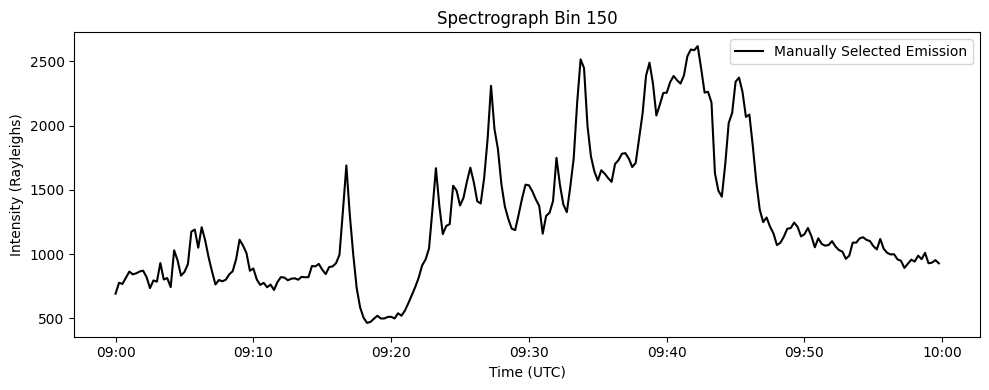

In [14]:
# Once again, we can also perform this calculation for a time series of spectrograph data

emission_wavelength_range = [625.0, 635.0] # nm
background_wavelength_range = [640.0, 645.0]  # nm

intensity = at.spectra.get_intensity(spect_data,
                                     spect_data.timestamp,
                                     spect_loc,
                                     spect_band=emission_wavelength_range,
                                     spect_band_bg=background_wavelength_range)

# The results will be a time series of each emission intensity. Let's plot them
x_axis = np.array(spect_data.timestamp)

# Create a stack plot for both the Green-line and Red-line emission intensities
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 4))

# plot green-line result
ax.plot(x_axis, intensity, color='black', label="Manually Selected Emission")
ax.set_title(f'Spectrograph Bin {spect_loc}')
ax.set_ylabel('Intensity (Rayleighs)')
ax.legend()

# Make the plot look nice
locator = mdates.AutoDateLocator()
formatter = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Time (UTC)')

plt.tight_layout()
plt.show()